## Data Exploration
We will start exploring the data before doing any analysis on it, we will try to see how our data is and how can we make it workable.

In [131]:
# Import required libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
## Modeling
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score


In [81]:
df = pd.read_csv("bank_data.csv")
df.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   checking_balance      1000 non-null   object
 1   months_loan_duration  1000 non-null   int64 
 2   credit_history        1000 non-null   object
 3   purpose               1000 non-null   object
 4   amount                1000 non-null   int64 
 5   savings_balance       1000 non-null   object
 6   employment_duration   1000 non-null   object
 7   percent_of_income     1000 non-null   int64 
 8   years_at_residence    1000 non-null   int64 
 9   age                   1000 non-null   int64 
 10  other_credit          1000 non-null   object
 11  housing               1000 non-null   object
 12  existing_loans_count  1000 non-null   int64 
 13  job                   1000 non-null   object
 14  dependents            1000 non-null   int64 
 15  phone                 1000 non-null   o

In [83]:
# Numeric columns statistic
df.describe().T

,count,mean,std,min,25%,50%,75%,max
months_loan_duration,1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0
amount,1000.0,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
percent_of_income,1000.0,2.973,1.118715,1.0,2.0,3.0,4.00,4.0
years_at_residence,1000.0,2.845,1.103718,1.0,2.0,3.0,4.00,4.0
age,1000.0,35.546,11.375469,19.0,27.0,33.0,42.00,75.0
existing_loans_count,1000.0,1.407,0.577654,1.0,1.0,1.0,2.00,4.0
dependents,1000.0,1.155,0.362086,1.0,1.0,1.0,1.00,2.0


In [84]:
df.describe(include=['O']).T

,count,unique,top,freq
checking_balance,1000,4,unknown,394
credit_history,1000,5,good,530
purpose,1000,6,furniture/appliances,473
savings_balance,1000,5,< 100 DM,603
employment_duration,1000,5,1 - 4 years,339
other_credit,1000,3,none,814
housing,1000,3,own,713
job,1000,4,skilled,630
phone,1000,2,no,596
default,1000,2,no,700


### Data manipulation
We have loaded the data into our dataframe but we see that we have so many unknowns & none values so we will try to reduce/eliminate those.

In [85]:
# Validate the missing values
df.isnull().sum()

checking_balance        0
months_loan_duration    0
credit_history          0
purpose                 0
amount                  0
savings_balance         0
employment_duration     0
percent_of_income       0
years_at_residence      0
age                     0
other_credit            0
housing                 0
existing_loans_count    0
job                     0
dependents              0
phone                   0
default                 0
dtype: int64

In [86]:
# Fetch columns based on data types
def get_data(data, data_type):
    return [column for column in data.columns if data[column].dtype == data_type]


In [87]:
def get_category_frequency_data(df, columns):
    category_frequency = []
    print(columns)
    for column in columns:
        print(column)
        unique_categories = df[column].unique()
        for category in unique_categories:
            frequency = (df[column] == category).sum()
            category_frequency.append({'Column': column, 'Category': category, 'Frequency': frequency})
            # Create a DataFrame and sort in descending order of frequency under each column
            category_frequency_df = pd.DataFrame(category_frequency)
            category_frequency_df.sort_values(by=['Column', 'Frequency'], ascending=[True, False], inplace=True)

            # Reset index for the final DataFrame
            category_frequency_df.reset_index(drop=True, inplace=True)
    return category_frequency_df

In [88]:
qualitative_columns = get_data(df, 'object')

get_category_frequency_data(df, qualitative_columns)


['checking_balance', 'credit_history', 'purpose', 'savings_balance', 'employment_duration', 'other_credit', 'housing', 'job', 'phone', 'default']
checking_balance
credit_history
purpose
savings_balance
employment_duration
other_credit
housing
job
phone
default


,Column,Category,Frequency
0,checking_balance,unknown,394
1,checking_balance,< 0 DM,274
2,checking_balance,1 - 200 DM,269
3,checking_balance,> 200 DM,63
4,credit_history,good,530
5,credit_history,critical,293
6,credit_history,poor,88
7,credit_history,very good,49
8,credit_history,perfect,40
9,default,no,700


In [89]:

get_category_frequency_data(df, ['purpose'])

['purpose']
purpose


,Column,Category,Frequency
0,purpose,furniture/appliances,473
1,purpose,car,337
2,purpose,business,97
3,purpose,education,59
4,purpose,renovations,22
5,purpose,car0,12


In [90]:
# Manipulate data for the type `purpose`
df['purpose'].str.replace('car0', 'car').unique()

array(['furniture/appliances', 'education', 'car', 'business',
       'renovations'], dtype=object)

In [91]:
df['purpose'] = df['purpose'].str.replace('car0', 'car')

In [92]:
get_category_frequency_data(df, ['purpose'])

['purpose']
purpose


,Column,Category,Frequency
0,purpose,furniture/appliances,473
1,purpose,car,349
2,purpose,business,97
3,purpose,education,59
4,purpose,renovations,22


In [93]:
df.isnull().sum()

checking_balance        0
months_loan_duration    0
credit_history          0
purpose                 0
amount                  0
savings_balance         0
employment_duration     0
percent_of_income       0
years_at_residence      0
age                     0
other_credit            0
housing                 0
existing_loans_count    0
job                     0
dependents              0
phone                   0
default                 0
dtype: int64

### Data Visualizations
We will do some data exploration via visualization to see the patterns in the data, as there are some data we can't see by naked eyes and watching numbers and categories.

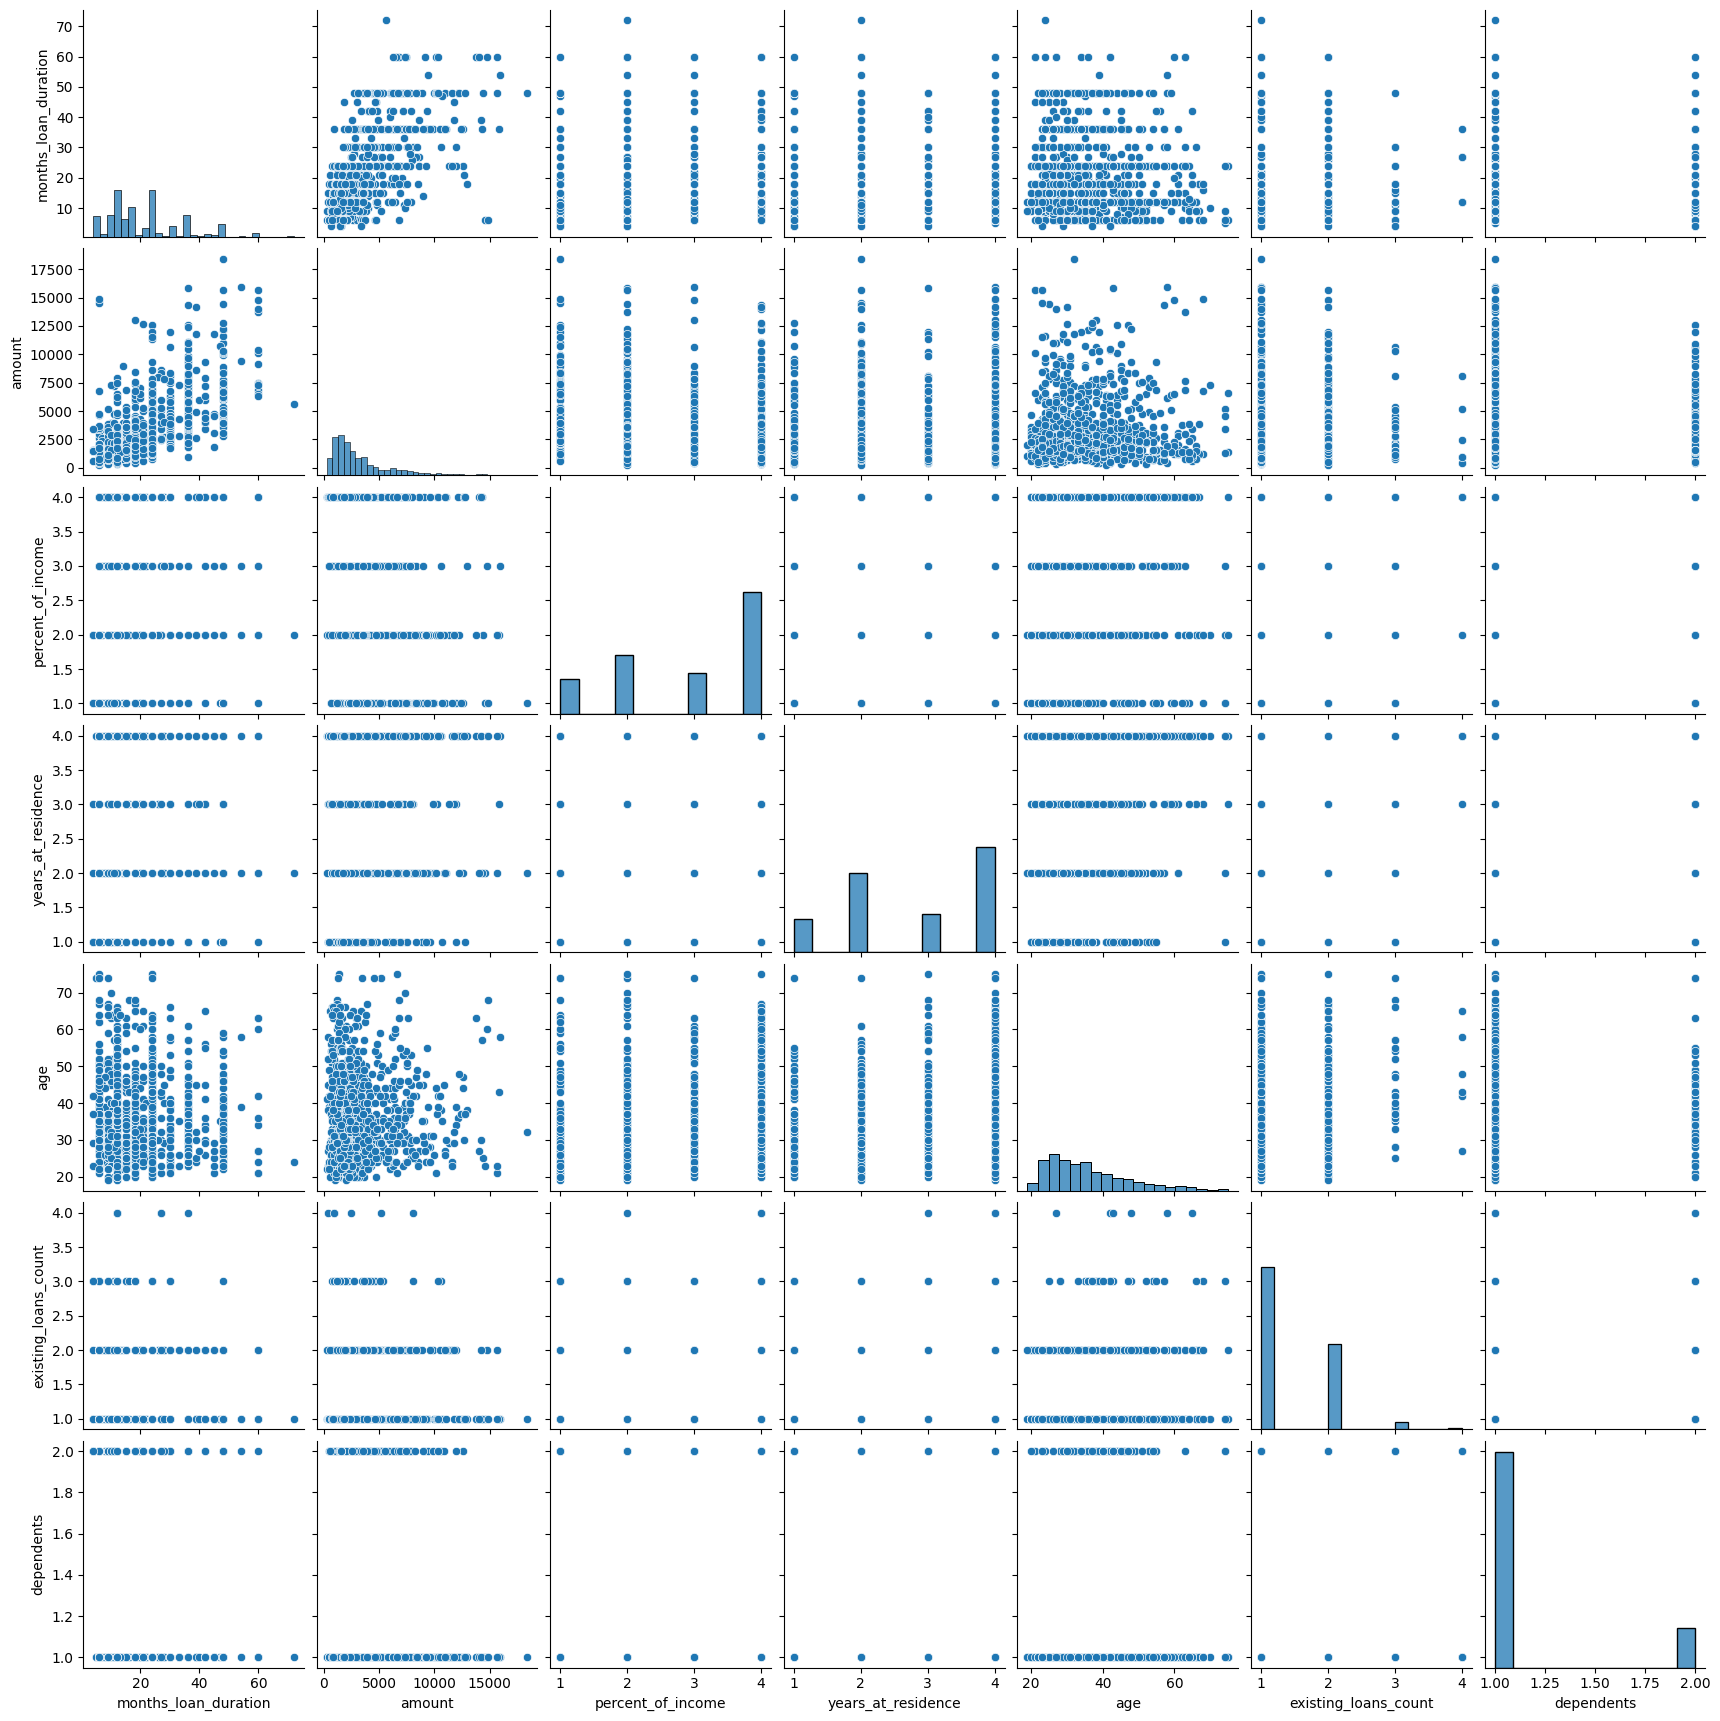

In [112]:
sns.pairplot(df)

### Numerical columns
I don't see any linear relation as such, we can try analyzing some numerical data and then we will move analyzing the categorical data

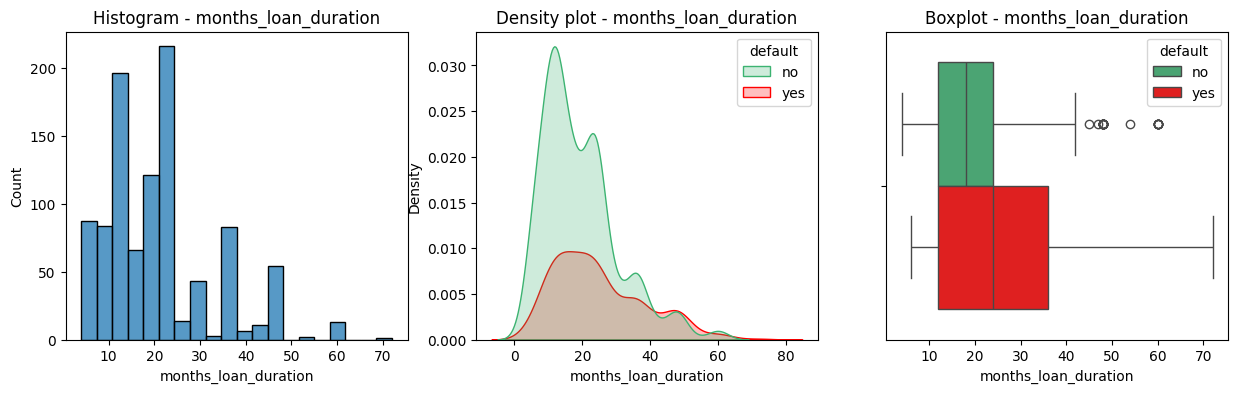

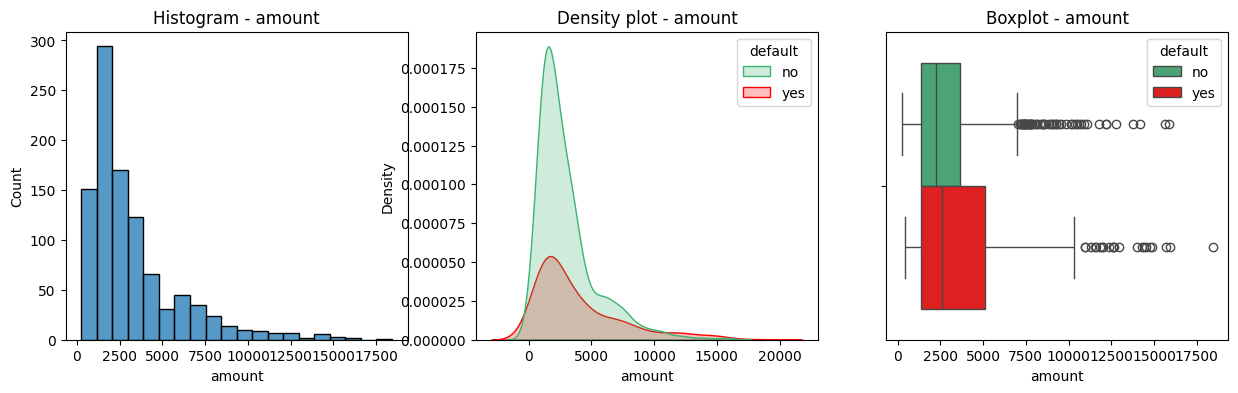

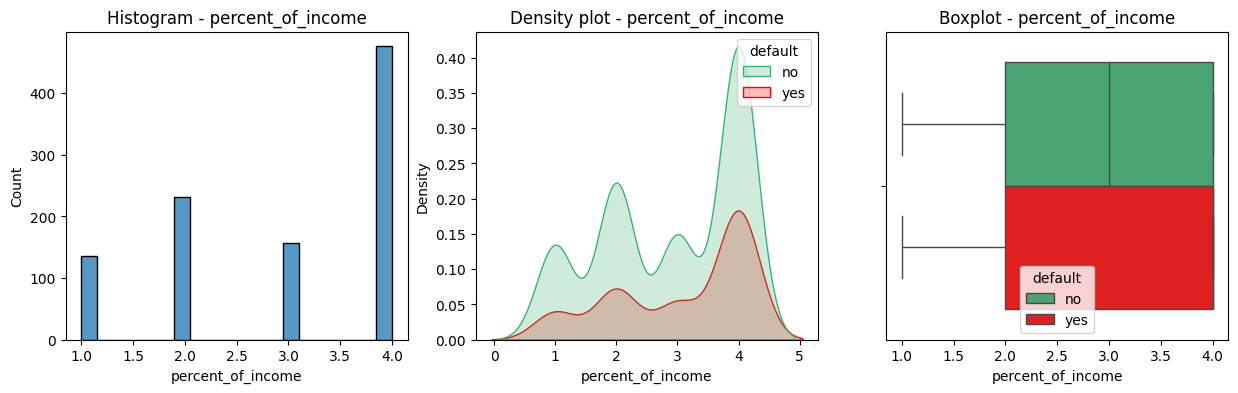

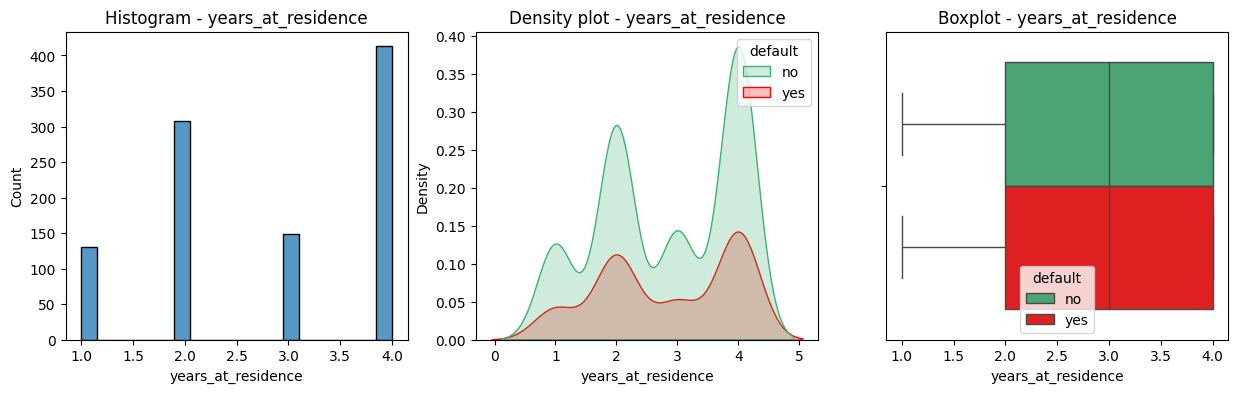

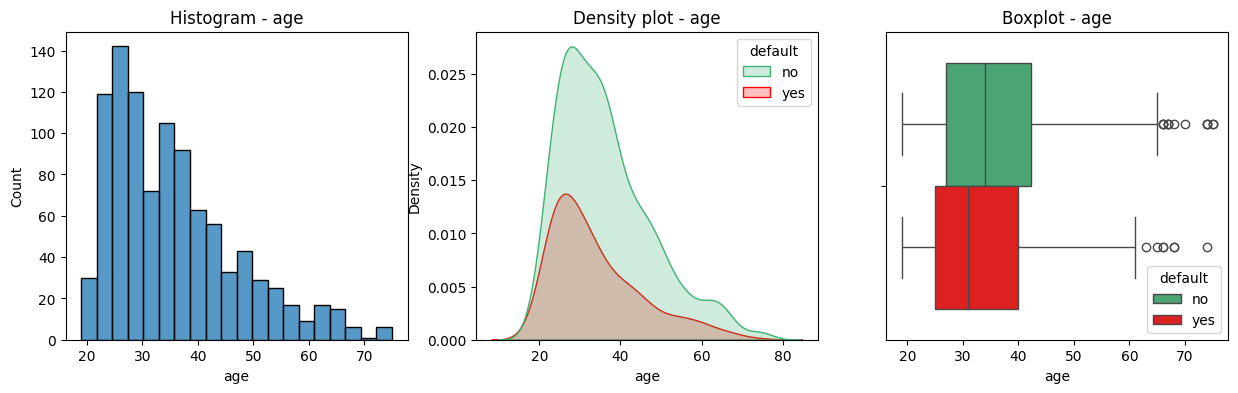

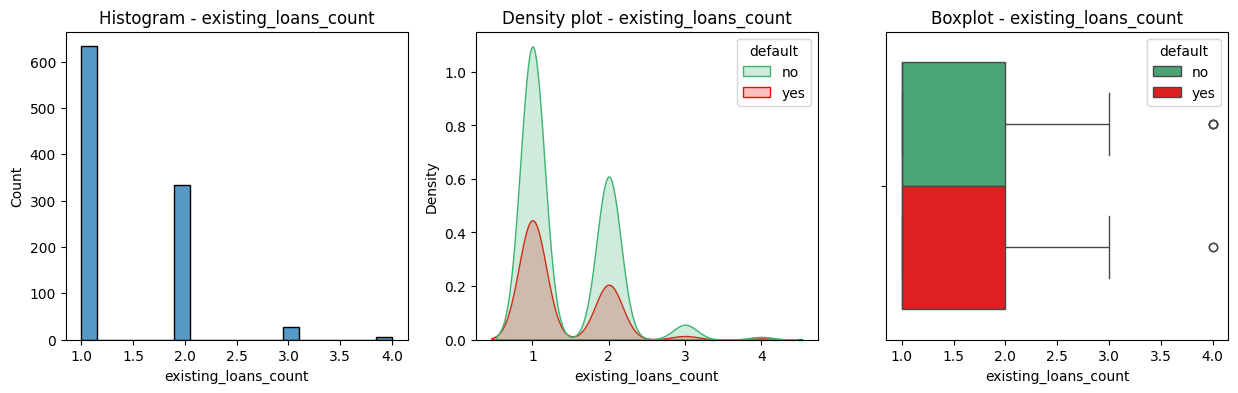

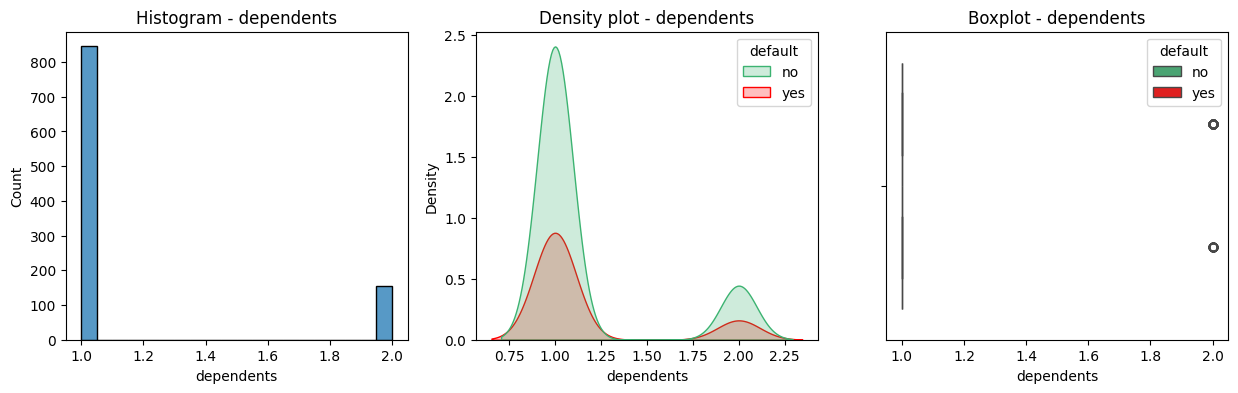

In [102]:


# Select only numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64'])

# Histogram, Density plot (hue='default') & Boxplots (hue='default') for each numerical column
for numerical_variable in numerical_columns.columns:
    # Create a figure with subplots
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 4))
    
    # Histogram without any hue='default'
    sns.histplot(data=df, x=numerical_variable, ax=ax1, bins=20, kde=False)
    ax1.set_title(f'Histogram - {numerical_variable}')
    
    # Kernel density with hue='default'
    sns.kdeplot(data=df, x=numerical_variable, hue='default', ax=ax2, fill=True,
                palette={'yes': 'red', 'no': 'mediumseagreen'})
    ax2.set_title(f'Density plot - {numerical_variable}')
    
    # Boxplot with hue='default'
    sns.boxplot(data=df, x=numerical_variable, hue='default', ax=ax3,
                palette={'yes': 'red', 'no': 'mediumseagreen'})
    ax3.set_title(f'Boxplot - {numerical_variable}')

    plt.show()

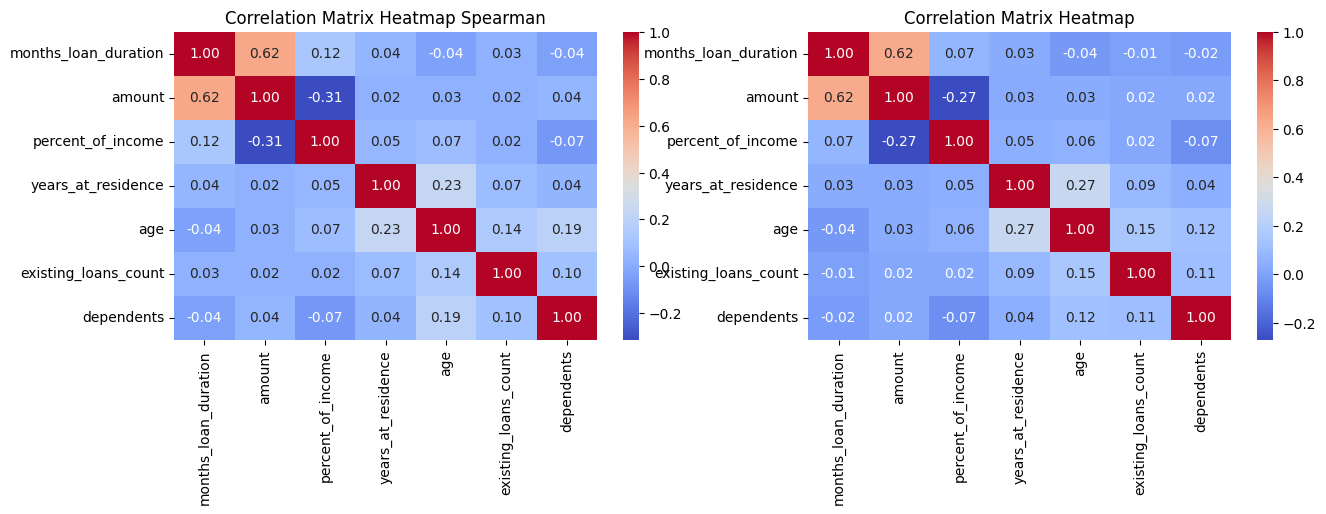

In [111]:
correlation_matrix_spearman = numerical_columns.corr(method='spearman')
correlation_matrix = numerical_columns.corr()


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 4))
# Heatmap of the correlation matrix
sns.heatmap(correlation_matrix_spearman, ax=ax1, annot=True, cmap='coolwarm', fmt=".2f")
ax1.set_title('Correlation Matrix Heatmap Spearman')

sns.heatmap(correlation_matrix, ax=ax2, annot=True, cmap='coolwarm', fmt=".2f")
ax2.set_title('Correlation Matrix Heatmap')
plt.show()

In [113]:
correlation_matrix_spearman

,months_loan_duration,amount,percent_of_income,years_at_residence,age,existing_loans_count,dependents
months_loan_duration,1.000000,0.624709,0.118046,0.043671,-0.036316,0.028430,-0.043265
amount,0.624709,1.000000,-0.313100,0.023646,0.026298,0.023778,0.041815
percent_of_income,0.118046,-0.313100,1.000000,0.047507,0.072157,0.020997,-0.072543
years_at_residence,0.043671,0.023646,0.047507,1.000000,0.234709,0.067193,0.040455
age,-0.036316,0.026298,0.072157,0.234709,1.000000,0.141287,0.190651
existing_loans_count,0.028430,0.023778,0.020997,0.067193,0.141287,1.000000,0.096978
dependents,-0.043265,0.041815,-0.072543,0.040455,0.190651,0.096978,1.000000


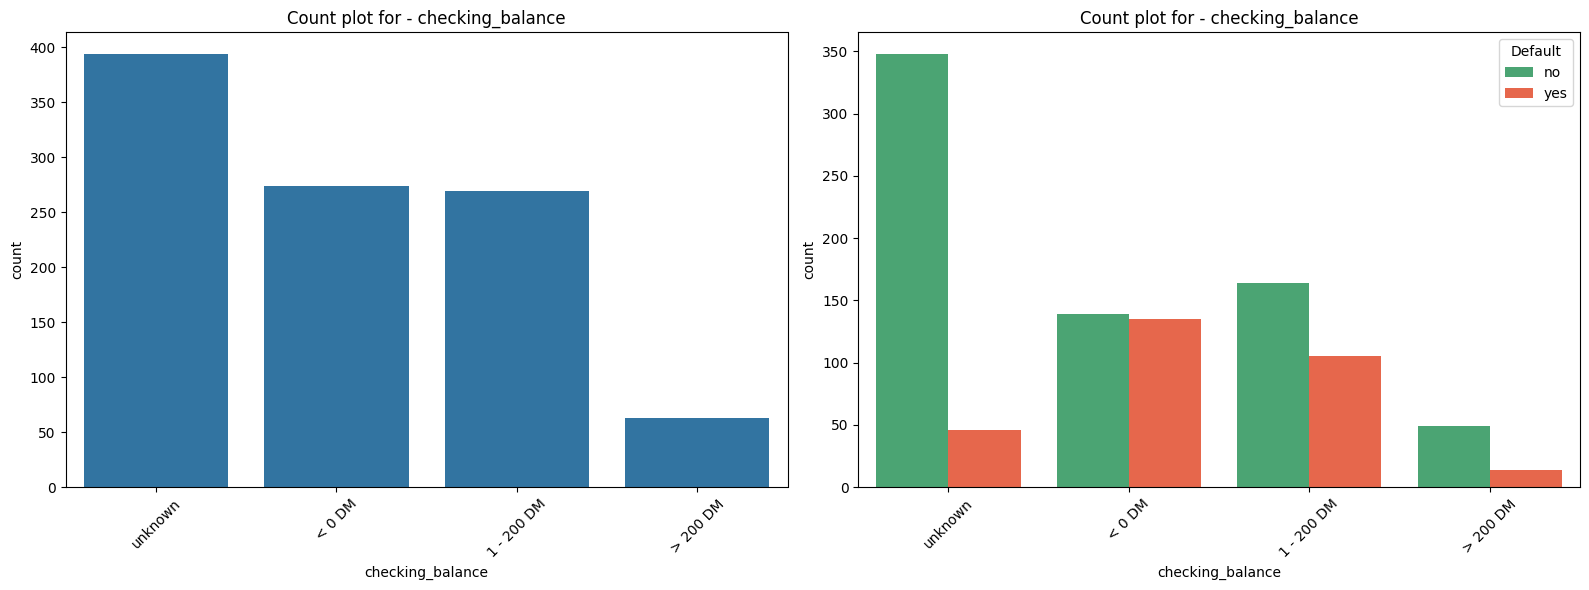

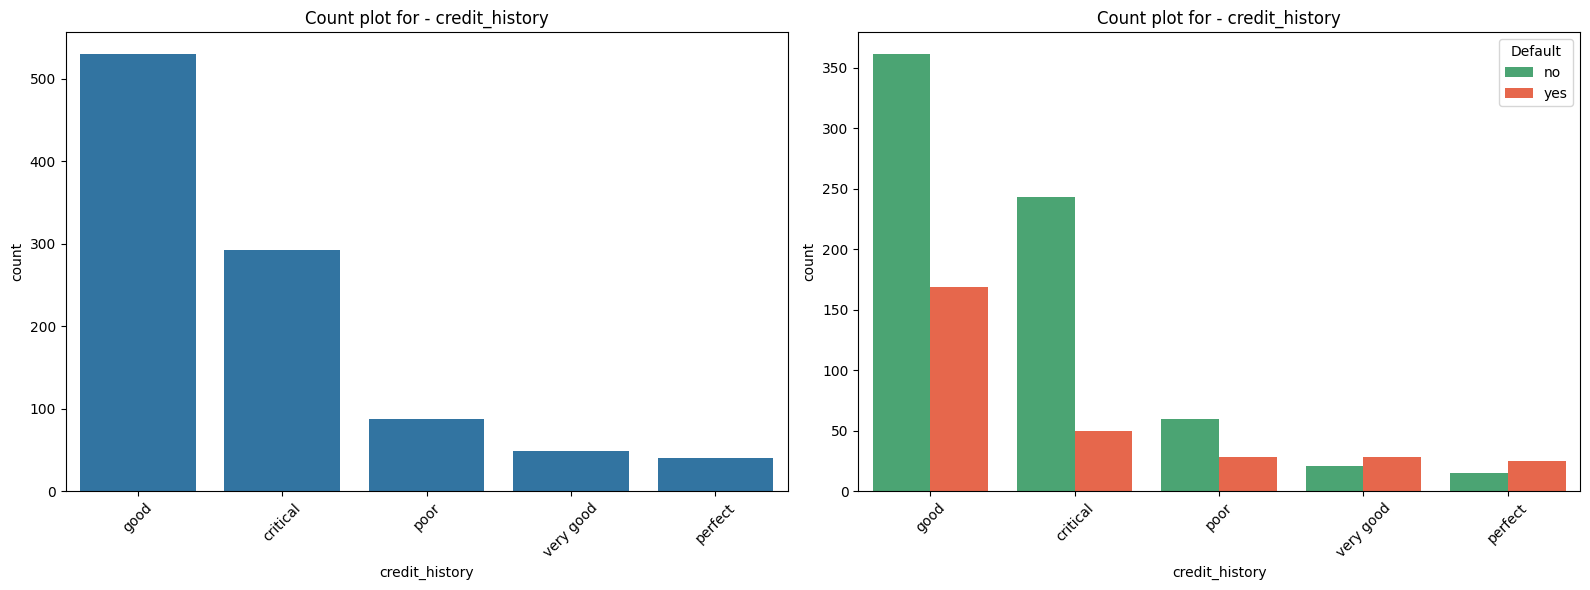

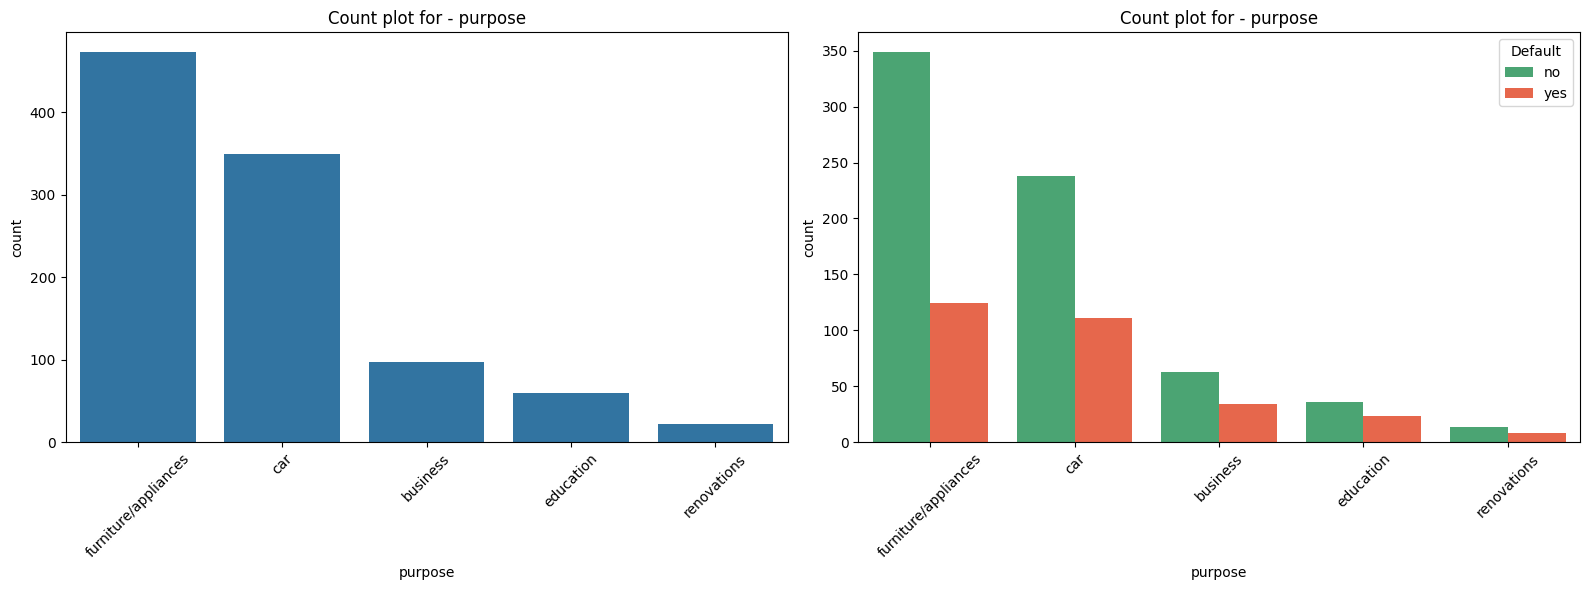

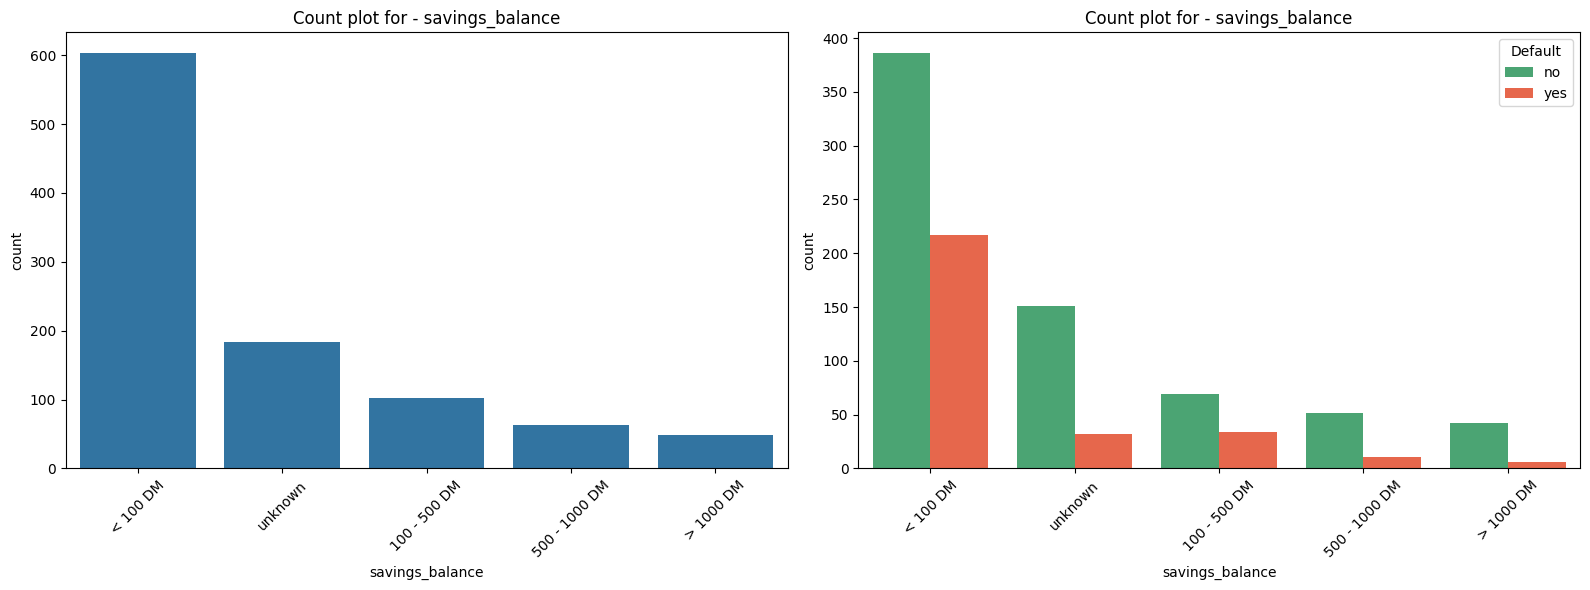

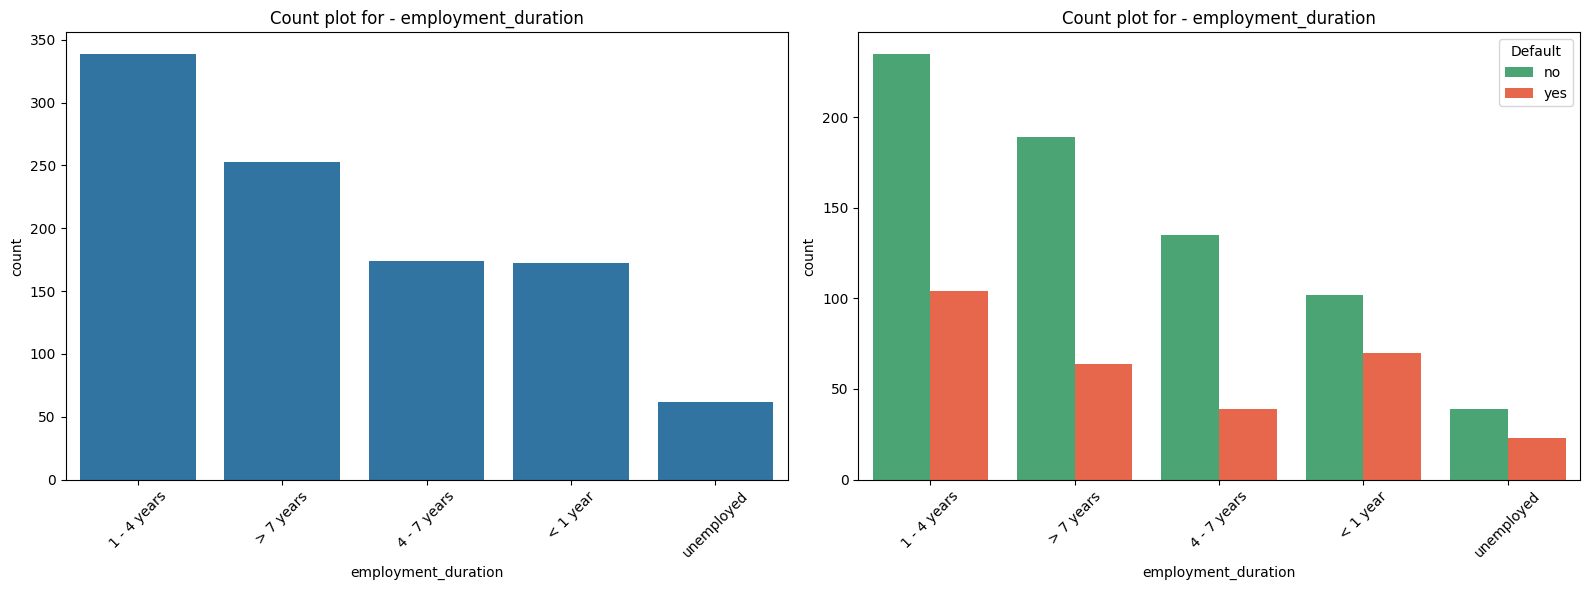

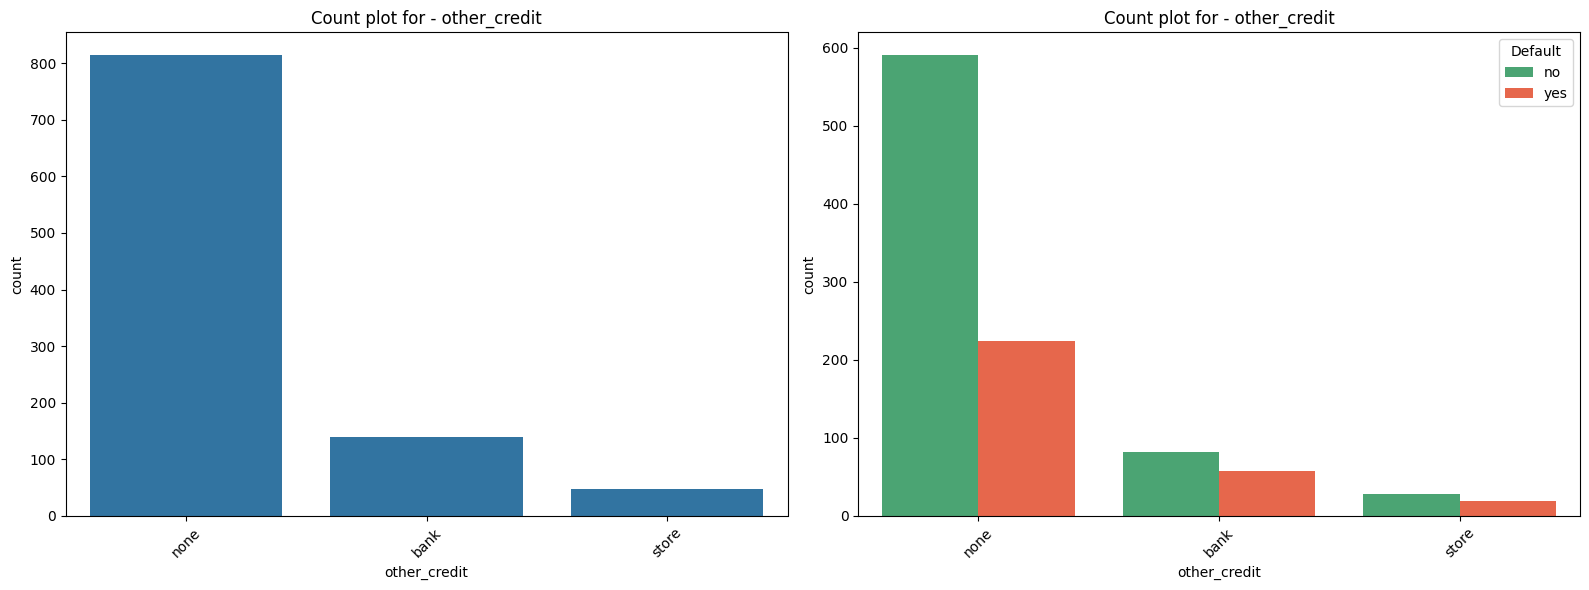

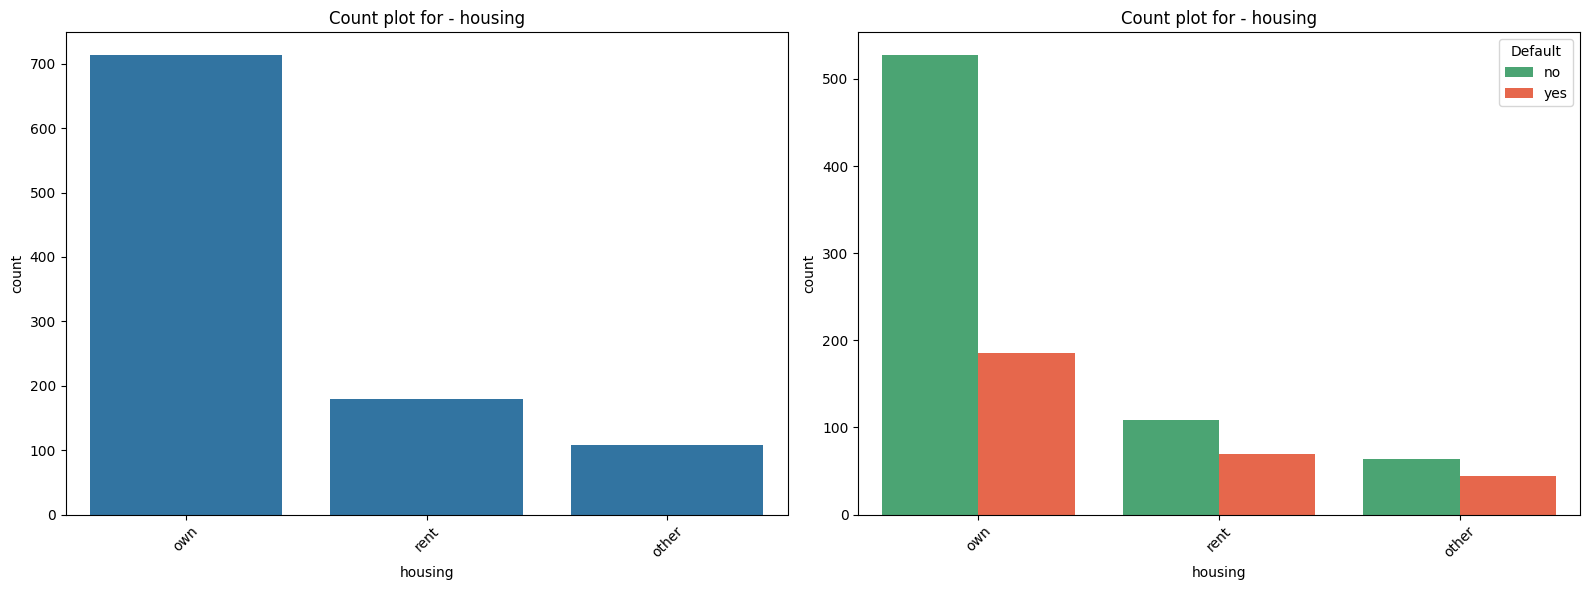

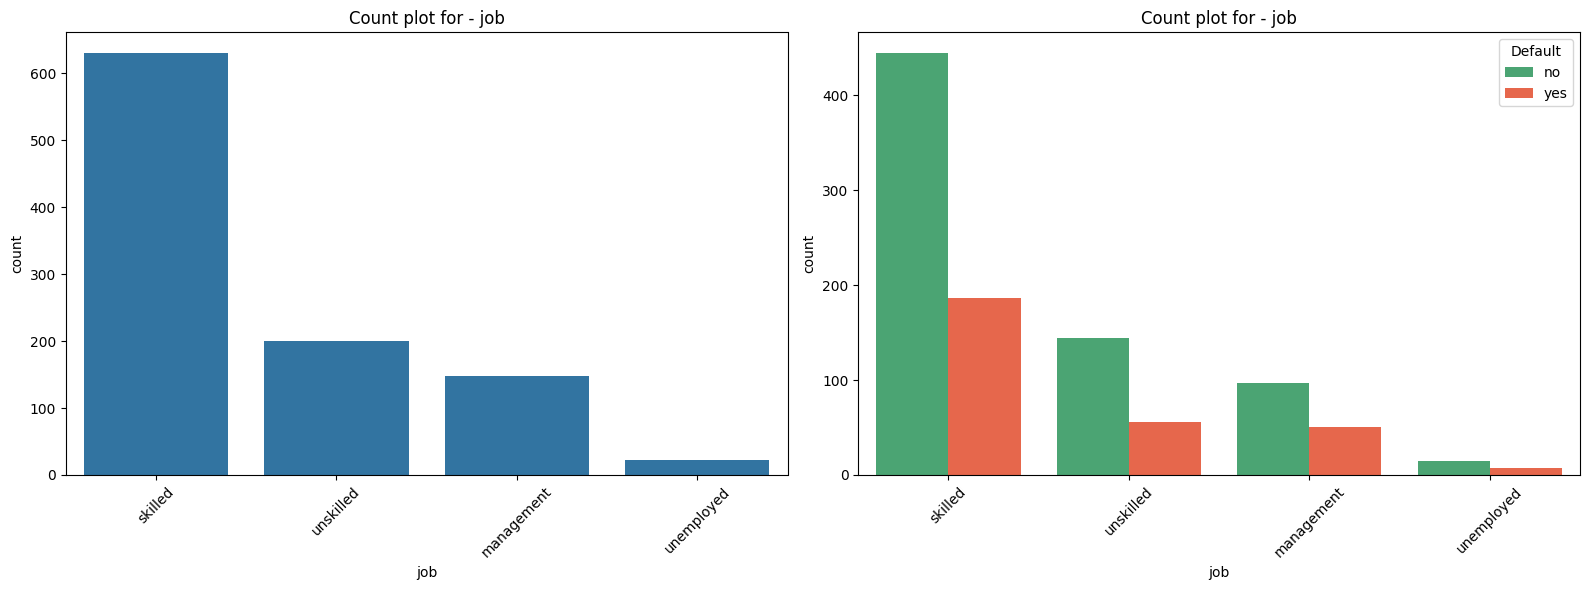

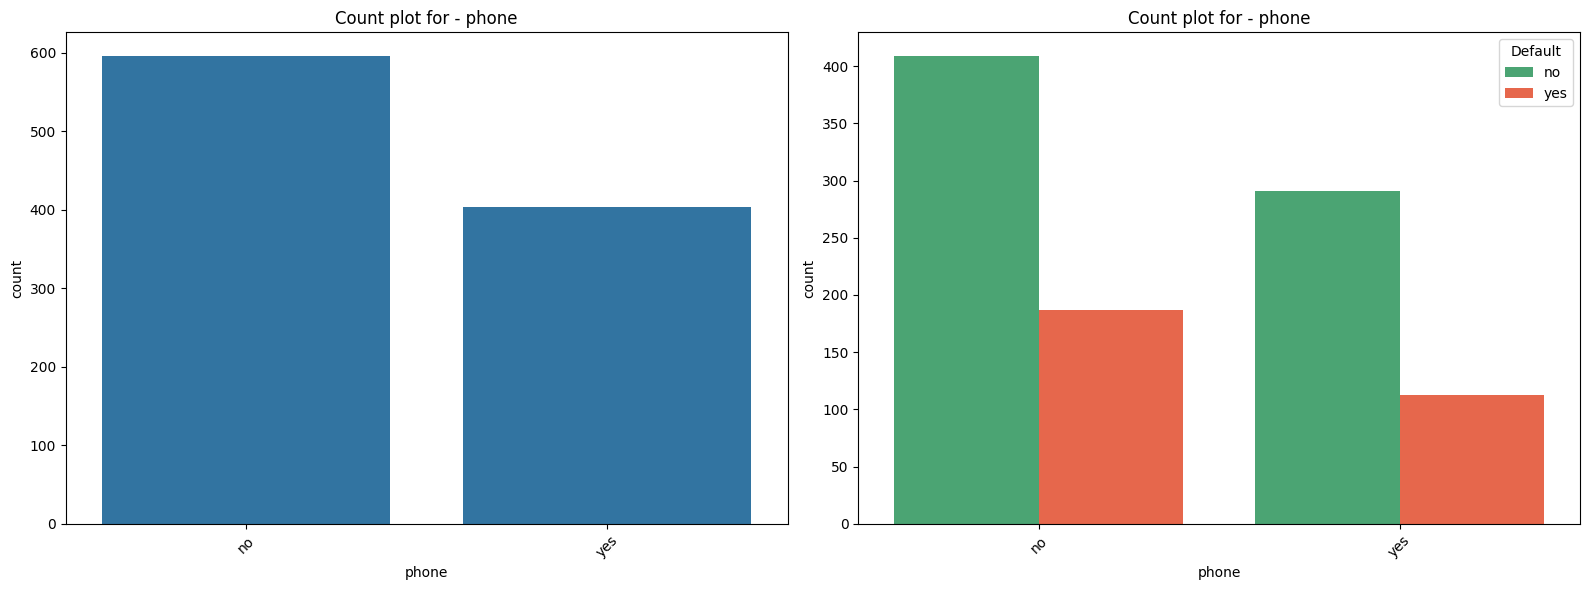

In [122]:
from matplotlib.colors import LinearSegmentedColormap
# Select only categorical columns (exclude 'default' column)
categorical_columns = df.select_dtypes(include=['object'])
categorical_columns = categorical_columns.drop(columns=['default'])

custom_palette = {'yes': '#FF5733',  # Red
                  'no': '#3CB371'}  # Medium Sea Green

# EDA for each categorical column with and without 'default' as the hue
for categorical_variable in categorical_columns.columns:
    plt.figure(figsize=(16, 6))
    
    # Count plot without hue='default' (sort by descending order)
    plt.subplot(1, 2, 1)  # First subplot
    sns.countplot(data=df, x=categorical_variable,
                  order=df[categorical_variable].value_counts().index)
    plt.title(f'Count plot for - {categorical_variable}')
    plt.xticks(rotation=45)
    
    # Count plot with hue='default' (sort by descending order)
    plt.subplot(1, 2, 2)  # Second subplot

    # Create the countplot with the specified palette
    sns.countplot(data=df, x=categorical_variable, hue='default',
              order=df[categorical_variable].value_counts().index,
              palette=custom_palette)

    plt.title(f'Count plot for - {categorical_variable}')
    plt.xticks(rotation=45)
    plt.legend(title='Default', loc='upper right')
    
    plt.tight_layout()
    plt.show()


## Machine Learning Models

Predictors variables

* Numerical Variables: ['months_loan_duration', 'amount', 'percent_of_income', 'years_at_residence', 'age', 'existing_loans_count', 'dependents']
* Categorical Variables:
* Nominal columns: ['checking_balance', 'purpose', 'savings_balance', 'other_credit', 'housing', 'job', 'phone']
* Ordinal columns: ['credit_history', 'employment_duration']
NOTE: Some of the columns having 'unknown', 'other', 'none' or 'unemployed' as a category and hence cannot be considered as an ordinal variable even though other categories within the column has a hierrachical order.

In [132]:
print(df.columns)
print(df.info())
df.head()

Index(['checking_balance', 'months_loan_duration', 'credit_history', 'purpose',
       'amount', 'savings_balance', 'employment_duration', 'percent_of_income',
       'years_at_residence', 'age', 'other_credit', 'housing',
       'existing_loans_count', 'job', 'dependents', 'phone', 'default'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   checking_balance      1000 non-null   object
 1   months_loan_duration  1000 non-null   int64 
 2   credit_history        1000 non-null   object
 3   purpose               1000 non-null   object
 4   amount                1000 non-null   int64 
 5   savings_balance       1000 non-null   object
 6   employment_duration   1000 non-null   object
 7   percent_of_income     1000 non-null   int64 
 8   years_at_residence    1000 non-null   int64 
 9   age                  

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes


In [141]:
nominal_data_cols = ['checking_balance', 'purpose', 'savings_balance', 'other_credit', 'housing', 'job', 'phone']
nominal_data = df[['checking_balance', 'purpose', 'savings_balance', 'other_credit', 'housing', 'job', 'phone']]

get_category_frequency_data(df, nominal_data_cols)



['checking_balance', 'purpose', 'savings_balance', 'other_credit', 'housing', 'job', 'phone']
checking_balance
purpose
savings_balance
other_credit
housing
job
phone


,Column,Category,Frequency
0,checking_balance,unknown,394
1,checking_balance,< 0 DM,274
2,checking_balance,1 - 200 DM,269
3,checking_balance,> 200 DM,63
4,housing,own,713
5,housing,rent,179
6,housing,other,108
7,job,skilled,630
8,job,unskilled,200
9,job,management,148


In [147]:
enc = OneHotEncoder()
encoded_nominal = enc.fit_transform(nominal_data)
encoded_nominal_cols = enc.get_feature_names_out(input_features=nominal_data_cols)

In [149]:
df_nominal_encoded = pd.DataFrame(encoded_nominal.toarray(), columns=encoded_nominal_cols)
df_nominal_encoded.head()

,checking_balance_1 - 200 DM,checking_balance_< 0 DM,checking_balance_> 200 DM,checking_balance_unknown,purpose_business,purpose_car,purpose_education,purpose_furniture/appliances,purpose_renovations,savings_balance_100 - 500 DM,...,other_credit_store,housing_other,housing_own,housing_rent,job_management,job_skilled,job_unemployed,job_unskilled,phone_no,phone_yes
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [151]:
df_nominal_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   checking_balance_1 - 200 DM    1000 non-null   float64
 1   checking_balance_< 0 DM        1000 non-null   float64
 2   checking_balance_> 200 DM      1000 non-null   float64
 3   checking_balance_unknown       1000 non-null   float64
 4   purpose_business               1000 non-null   float64
 5   purpose_car                    1000 non-null   float64
 6   purpose_education              1000 non-null   float64
 7   purpose_furniture/appliances   1000 non-null   float64
 8   purpose_renovations            1000 non-null   float64
 9   savings_balance_100 - 500 DM   1000 non-null   float64
 10  savings_balance_500 - 1000 DM  1000 non-null   float64
 11  savings_balance_< 100 DM       1000 non-null   float64
 12  savings_balance_> 1000 DM      1000 non-null   fl

In [163]:
ordinal_col_keys = ['credit_history', 'employment_duration']
get_category_frequency_data(df, ordinal_col_keys)


['credit_history', 'employment_duration']
credit_history
employment_duration


,Column,Category,Frequency
0,credit_history,good,530
1,credit_history,critical,293
2,credit_history,poor,88
3,credit_history,very good,49
4,credit_history,perfect,40
5,employment_duration,1 - 4 years,339
6,employment_duration,> 7 years,253
7,employment_duration,4 - 7 years,174
8,employment_duration,< 1 year,172
9,employment_duration,unemployed,62


In [168]:
# Ordinal encoding

from sklearn.preprocessing import OrdinalEncoder

ordinal_cols = {
    'credit_history': ['critical', 'poor', 'good', 'very good', 'perfect'],
    'employment_duration': ['unemployed', '< 1 year', '1 - 4 years', '4 - 7 years', '> 7 years']
}

df_ordinal = df[ordinal_col_keys]

ordinal_encoder = OrdinalEncoder(categories=[ordinal_cols[col] for col in df_ordinal.columns])

df_ordinal_encoded = pd.DataFrame(ordinal_encoder.fit_transform(df_ordinal), columns=df_ordinal.columns)

encoded_ordinal_suffix = "_encoded"
df_ordinal_encoded.columns = [f"{col}{encoded_ordinal_suffix}" for col in df_ordinal_encoded.columns]

df_ordinal_encoded

,credit_history_encoded,employment_duration_encoded
0,0.0,4.0
1,2.0,2.0
2,0.0,3.0
3,2.0,3.0
4,1.0,2.0
...,...,...
995,2.0,3.0
996,2.0,2.0
997,2.0,4.0
998,2.0,2.0


In [165]:
ordinal_encoder

OrdinalEncoder(categories=[['critical', 'poor', 'good', 'very good', 'perfect'],
                           ['unemployed', '< 1 year', '1 - 4 years',
                            '4 - 7 years', '> 7 years']])